In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

1. Download CIFAR-10 Dataset

In [16]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

data_batch_1 = unpickle("cifar-10-batches-py\data_batch_1") 
#print(cifar_dict)



In [17]:
# list the dictionary key value pairs 
data_batch_1.keys()


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [19]:
data_batch_1[b'data']

# see shape of data 
data_batch_1[b'data'].shape


(10000, 3072)

In [23]:
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [24]:
image = image.transpose(1,2,0)
print(image.shape)
image

(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

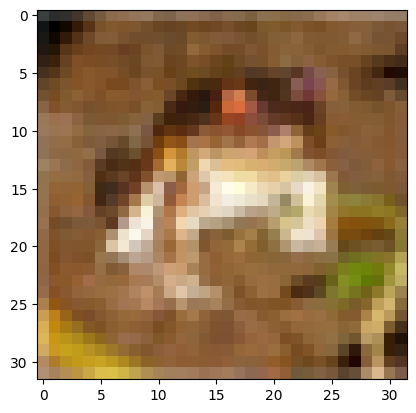

In [27]:
plt.imshow(image)

(10000, 32, 32, 3)


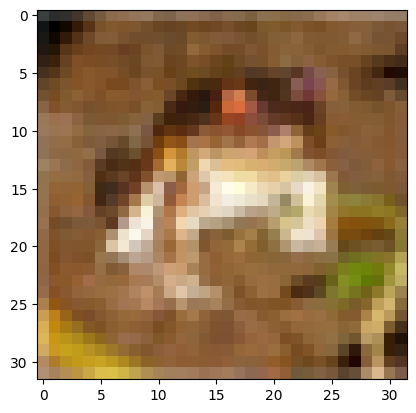

In [29]:
data = data_batch_1[b'data']
data = data.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data.shape)
#plt.imshow(data[0])

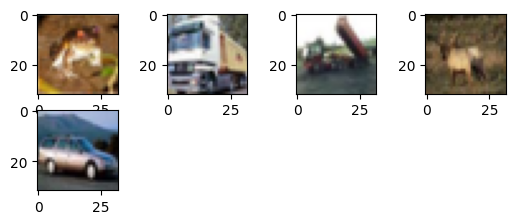

In [32]:
for i in range(5):
    plt.subplot(4,4,i+1)
    plt.imshow(data[i])
plt.show()

In [ ]:
print(data_batch_1[b'labels'])

In [47]:
airplanes_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 0]

first_five_airplanes = airplanes_indices[:5]

print(first_five_airplanes)

[29, 30, 35, 49, 77]


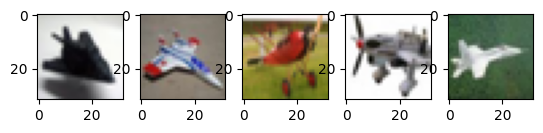

In [51]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_airplanes[i]])
plt.show()

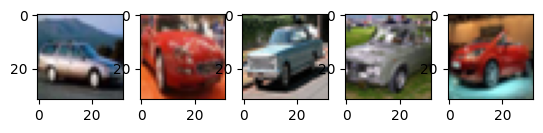

In [53]:
auto_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 1]

first_five_auto = auto_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_auto[i]])
plt.show()


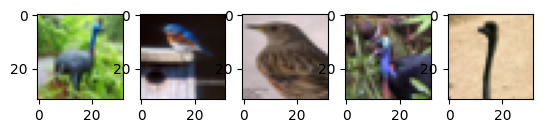

In [55]:
bird_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 2]

first_five_bird = bird_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_bird[i]])
plt.show()

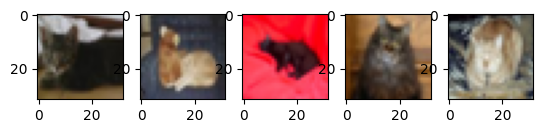

In [56]:
cat_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 3]

first_five_cat = cat_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_cat[i]])
plt.show()

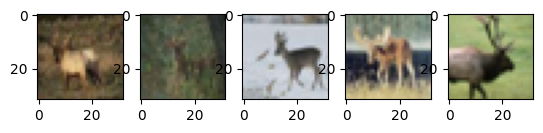

In [57]:
deer_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 4]

first_five_deer = deer_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_deer[i]])
plt.show()

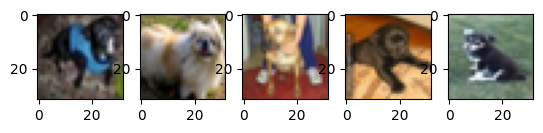

In [58]:
dog_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 5]

first_five_dog = dog_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_dog[i]])
plt.show()

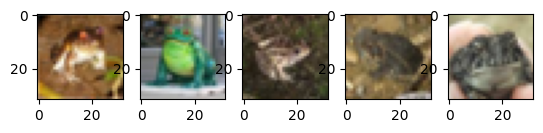

In [59]:
frog_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 6]

first_five_frog = frog_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_frog[i]])
plt.show()

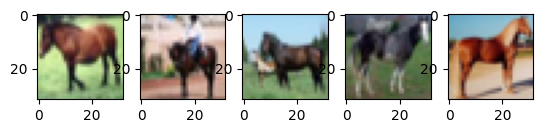

In [61]:
horse_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 7]

first_five_horse = horse_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_horse[i]])
plt.show()

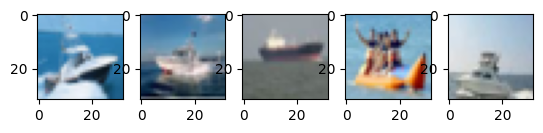

In [62]:
ship_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 8]

first_five_ship = ship_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_ship[i]])
plt.show()

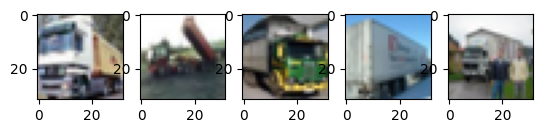

In [63]:
truck_indices = [i for i, x in enumerate(data_batch_1[b'labels']) if x == 9]

first_five_truck = truck_indices[:5]

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(data[first_five_truck[i]])
plt.show()

2. Exploratory Data Analysis